### 라이브러리 불러오기

In [63]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

In [82]:

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [80]:
# 컬러 프리셋
facecolor = '#DADBBD'
sup_facecolor = '#6EBF8B'
plotcolor = '#D82148'
fontcolor = '#151D3B'
sns.set(rc={'axes.facecolor':facecolor})

### 데이터 전처리

In [3]:
articles = pd.read_csv('../git/Datasets/articles.csv')
customers = pd.read_csv('../git/Datasets/customers.csv')
transactions = pd.read_csv('../git/Datasets/transactions_train.csv')


In [6]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

In [7]:
side_by_side(articles.isnull().sum(), articles.nunique())

article_id                        0    article_id                      105542
product_code                      0    product_code                     47224
prod_name                         0    prod_name                        45875
product_type_no                   0    product_type_no                    132
product_type_name                 0    product_type_name                  131
product_group_name                0    product_group_name                  19
graphical_appearance_no           0    graphical_appearance_no             30
graphical_appearance_name         0    graphical_appearance_name           30
colour_group_code                 0    colour_group_code                   50
colour_group_name                 0    colour_group_name                   50
perceived_colour_value_id         0    perceived_colour_value_id            8
perceived_colour_value_name       0    perceived_colour_value_name          8
perceived_colour_master_id        0    perceived_colour_master_i

In [8]:
side_by_side(customers.isnull().sum(), customers.nunique())

customer_id                    0    customer_id               1371980
FN                        895050    FN                              1
Active                    907576    Active                          1
club_member_status          6062    club_member_status              3
fashion_news_frequency     16009    fashion_news_frequency          4
age                        15861    age                            84
postal_code                    0    postal_code                352899
dtype: int64                        dtype: int64                     



In [10]:
side_by_side(transactions.isnull().sum(), transactions.nunique())

t_dat               0    t_dat                   734
customer_id         0    customer_id         1362281
article_id          0    article_id           104547
price               0    price                  9857
sales_channel_id    0    sales_channel_id          2
dtype: int64             dtype: int64               



In [5]:
print("articles shape : ",articles.shape,"\ncustomers shape : ", customers.shape, "\ntransactions shape : ", transactions.shape)

articles shape :  (105542, 25) 
customers shape :  (1371980, 7) 
transactions shape :  (31788324, 5)


article dataset 에서 article_id를 제외한 _no, _code, _id 가 들어간 칼럼들을 제거해주었다. 

In [23]:
article_delete = ['_no','_code','_id']
articles_clean = articles.loc[:,~articles.columns.str.contains('|'.join(article_delete), case =False)]
articles_clean.insert(0, 'article_id', articles['article_id'])
articles_clean.sample(5)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
21343,593783005,JACKIE TEE,T-shirt,Garment Upper body,Stripe,White,Light,White,Young Girl Jersey Basic,Children Sizes 134-170,Baby/Children,Girls Underwear & Basics,Jersey Basic,Wide top in soft cotton and modal jersey with ...
50900,697688001,Merino 2 p sock,Socks,Socks & Tights,Solid,Black,Dark,Black,Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,"Socks in soft, fine-knit merino wool with elas..."
622,270381001,Clubba sunglasses,Sunglasses,Accessories,Solid,Yellowish Brown,Dark,Brown,Sunglasses,Ladies Accessories,Ladieswear,Womens Small accessories,Accessories,Sunglasses with plastic and metal frames and t...
5250,493438012,Leo seamless t-shirt (1),T-shirt,Garment Upper body,Melange,Black,Dark,Black,Ladies Sport Bras,Sport,Sport,Ladies H&M Sport,Jersey Fancy,NaN
66233,747197001,Barcelona jumpsuit,Jumpsuit/Playsuit,Garment Full body,All over pattern,Black,Dark,Black,Dresses,Divided,Divided,Divided Collection,Dresses Ladies,Playsuit in a patterned viscose weave with nar...


transcations 의 't_dat' 을 datetime 으로 바꾸어 주었다

In [45]:
transactions.info()
display(transactions.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


,t_dat,customer_id,article_id,price,sales_channel_id
23964504,2020-04-01,c35b93f19925a156bae0424cf4c52fe3be4ee59e270527...,714790008,0.028797,2
14403053,2019-07-24,6097a675666116b58f607a70363bca6076713ea5df4b47...,697564001,0.006763,1
20616193,2019-12-26,234d3dbfe20870ca96a683c90a4c4d1f2c9df74a039dfa...,536139012,0.010153,2
21675079,2020-01-26,3fe4ba45acf3eb7c5e71f50be0a965669a7711255d9950...,814763004,0.019814,2
11123911,2019-05-31,9e1ed72657aa09d69a642573e4feb213b2a71f4badc00d...,399256005,0.016932,2


In [46]:
transactions['t_dat'] =pd.to_datetime(transactions['t_dat'], format='%Y/%m/%d')
print("데이터 측정기간은 ", transactions['t_dat'].min(),"에서 ", transactions['t_dat'].max(), "입니다")

데이터 측정기간은  2018-09-20 00:00:00 에서  2020-09-22 00:00:00 입니다


위에서 알 수 있다시피 transactions 데이터셋은 2년간의 거래내역을 가지고 있다.

### H & M 거래량 트렌드
- 2년간의 회사의 거래량 변화
- 비정상적 매출 감지

In [71]:
trans_time=transactions.groupby('t_dat').sum()[['price']].reset_index()


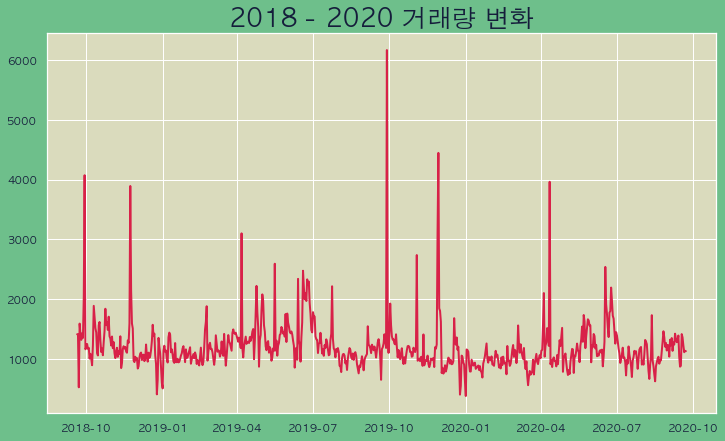

In [102]:
# trans_time.head()
trans_time = trans_time.sort_values('t_dat')

fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,7)
ax.plot('t_dat', 'price', data=trans_time, color='#D82148', linewidth=2)
ax.set_title('2018 - 2020 거래량 변화', color = fontcolor, size = 25, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold')
plt.yticks(color = fontcolor, fontweight = 'bold')
plt.show()

그래프를 출력했을때 비정상적으로 매출이 높은 날들이 보인다

In [99]:
trans_time.sort_values('price', ascending = False).head()

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


상위 5개의 최대 매출을 올린 날짜는 이러하다. 이 날짜에 어떠한 이벤트가 있었는지 추후에 조사하면 좋을 것 같다 

### H & M 상위 매출 제품군

In [47]:
best_product = pd.DataFrame(transactions, columns = ['article_id', 'price'])
best_product_merge = pd.DataFrame(articles, columns = ['article_id', 'product_group_name'])
best_product = pd.merge(best_product,best_product_merge, how='left', on='article_id')

In [100]:
best_product_grouped = best_product.groupby('product_group_name').sum()[['price']].sort_values('price', ascending = False).reset_index()

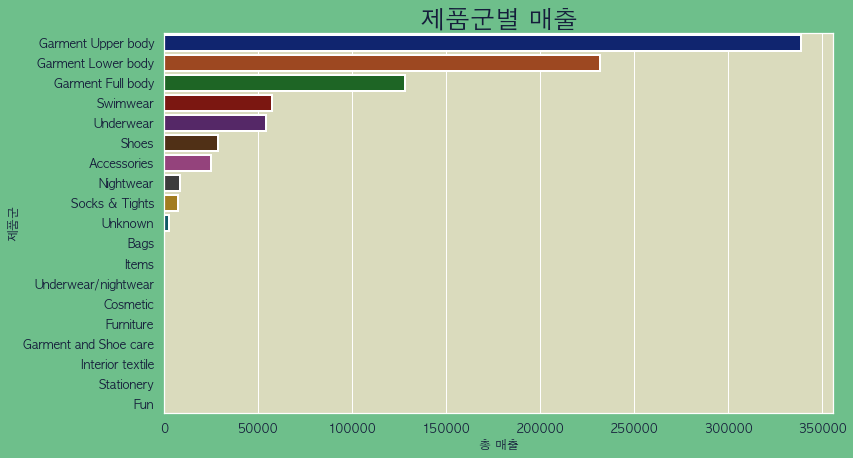

In [108]:
fig, ax = plt.subplots(facecolor= sup_facecolor)
fig.set_size_inches(12,7)
sns.barplot(data=best_product_grouped, x = 'price' , y = 'product_group_name', palette = 'dark', linewidth=2)
plt.title('제품군별 매출', color = fontcolor, size = 25, fontweight = 'bold')
plt.xlabel('총 매출', color = fontcolor, fontweight = 'bold')
plt.ylabel('제품군', color = fontcolor, fontweight = 'bold')
plt.xticks(color = fontcolor, fontweight = 'bold', size =12)
plt.yticks(color = fontcolor, fontweight = 'bold', size =12)
plt.show()

가장 많은 매출을 올린 상위 3개의 제품군은 크게 놀라운 결과는 아니였다. 상의(upper body),하의(lower body),한벌옷(full body) 가 주를 이루었다

### Top10 구매자

In [135]:

trans_grouped = transactions.groupby('customer_id').agg({'price':'sum', 'article_id':'count'}).reset_index()
customers_extract = pd.DataFrame(customers, 
                                 columns = ['customer_id', 'club_member_status', 
                                            'fashion_news_frequency', 'age', 'postal_code'])



In [139]:
trans_grouped.rename(columns = {'price': 'purchased_amt','article_id': 'purchased_item'}, inplace = True)
trans_cus_merged = pd.merge(customers_extract, trans_grouped, how = 'left', on = 'customer_id')
trans_cus_merged.head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code,purchased_amt,purchased_item
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.648983,21.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.601932,86.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.704780,18.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.060983,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.469695,13.0


In [171]:
top10 = trans_cus_merged.iloc[:,np.r_[:1,-1,3]]
top10 = top10.sort_values('purchased_item', ascending = False).head(10)
display(top10)
print("top 10의 평균 상품 구매 개수는 ",top10.purchased_item.mean(),'개 입니다')
print("top 10의 평균 연령은 ", top10.age.mean(), '세 입니다')

,customer_id,purchased_item,age
1018839,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895.0,31.0
969180,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441.0,25.0
394603,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364.0,28.0
891429,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361.0,61.0
1098652,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237.0,68.0
459261,55d15396193dfd45836af3a6269a079efea339e875eff4...,1208.0,36.0
1035425,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,1170.0,46.0
760470,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1169.0,60.0
20300,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1157.0,51.0
582904,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1143.0,32.0


top 10의 평균 상품 구매 개수는  1314.5 개 입니다
top 10의 평균 연령은  43.8 세 입니다


### 패션 뉴스 빈도수와 매출의 상관관계

In [173]:
trans_cus_merged['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

fashion_news

In [128]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
